In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crypto_data.csv')

In [3]:
df =df[(df['IsTrading']==True)]

In [4]:
df = df[(df['TotalCoinsMined']>0)]

In [5]:
del df['IsTrading']

In [6]:
del df['Unnamed: 0']

In [7]:
coin_name = df.groupby(df['CoinName'])

In [15]:
del df['CoinName']

In [16]:
df.dropna()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [17]:
df =pd.get_dummies(df,columns = ['ProofType','Algorithm'])

In [18]:
# Scale the data
df_scaled = StandardScaler().fit_transform(df)

In [36]:
pca = PCA(n_components=0.9)
df_pca = pca.fit_transform(df_scaled)

In [37]:
# Run t-SNE
tsne = TSNE()
tsne_features = tsne.fit_transform(df_pca)

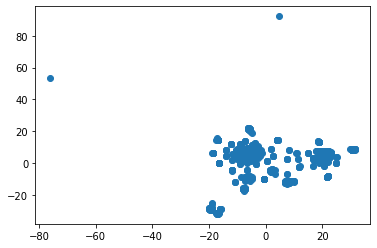

In [38]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [39]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
data = {"k": k, "inertia": inertia}
df_in=pd.DataFrame(df_pca)
df_in.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.070224e-11,4.488298e-14,-2.054929e-14,-0.007129,-1.319756,-0.051813,...,3.488457e-15,2.621929e-15,5.866344e-16,-1.112322e-15,7.537301e-16,-1.620960e-15,3.274752e-15,1.144039e-16,9.504354e-16,-3.536868e-15
1,-0.318434,1.032331,-0.591126,0.001386,-1.061483e-11,4.344957e-14,-1.671674e-14,-0.007739,-1.322514,-0.056674,...,5.523532e-15,2.211056e-15,6.117937e-16,-8.889500e-16,1.144871e-15,-1.435342e-15,3.164249e-15,6.555669e-16,1.459115e-16,-4.094510e-15
2,2.305468,1.656383,-0.683617,0.004731,-3.640702e-11,6.491291e-14,-9.741459e-15,-0.054781,-1.542879,-0.943951,...,-6.265196e-14,2.966623e-14,-5.303892e-14,-1.174297e-14,-4.018956e-14,-3.025034e-15,-4.280833e-14,1.553694e-14,2.327407e-14,1.448830e-14
3,-0.145184,-1.320593,0.192813,-0.001229,9.447908e-12,-1.476217e-14,8.066939e-15,-0.002071,0.281463,0.251862,...,-9.353504e-15,-2.931282e-16,-2.012114e-14,-8.046215e-15,-4.907227e-15,2.335433e-15,-1.744985e-14,2.109496e-15,1.299057e-15,3.133353e-15
4,-0.151768,-2.036192,0.396182,-0.001705,1.310295e-11,-3.617756e-14,1.161706e-14,0.027735,0.519099,0.188820,...,-3.731962e-15,-8.971445e-14,-1.733647e-13,-2.301553e-14,3.489553e-14,-2.181606e-14,-9.467575e-14,3.582664e-14,6.648660e-14,1.494847e-14


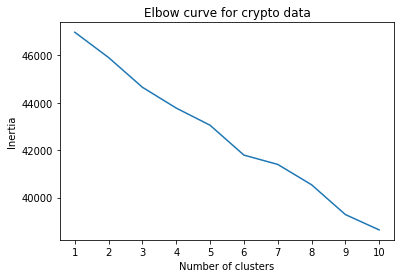

In [40]:
plt.plot(data['k'], data['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

In [ ]:
#The model was unable to get any meaningful clusters
#Recommend removing outliers and minimizing features